In [1]:
#import data
import csv
import numpy as np
with open('county_facts.csv', 'r') as f:
    reader = csv.reader(f)
    info = list(reader)

with open('county_results.csv', 'r') as f:
    reader = csv.reader(f)
    results = list(reader)

important columns:
0 - fips
1 - name of county
2 - state Abreveation
3 - 2014 population
9 - population w/ age >65
10 - female population
11 - white pop
12 - black pop
13 - indian pop
14 - asian pop
15 - pacific islander
17 - hispanic pop
22 - pop w/ high school grad or above
24 - vets
31 - persons per household
33 - median household income
53 - population per square mile

In [2]:
#get only county data
countyData=[]
countyResults=[]
for x in range(0,len(info)):
    if "County" in info[x][1]:
        countyData.append(info[x])
for x in range(0,len(results)):
    if "County" in results[x][8]:
        countyResults.append(results[x])

In [3]:
#intialize classification
classification =[]
for x in range(0,len(countyData)):
    classification.append(-1)

REPUBLICATION = 1 DEMOCRAT = 0

In [4]:
#get Classifications from results.csv
for x in range(0,len(countyData)):
    for y in range(0,len(countyResults)):
        if (countyResults[y][8]==countyData[x][1]):
            if (countyResults[y][10]=='R'):
                classification[x]=1
            else:
                classification[x]=0
            break
p1=0
p0=0
for x in range(0,len(classification)):
    if (classification[x]==1):
        p1+=1
    if (classification[x]==0):
        p0+=1
print(p0,p1)

513 2492


In [5]:
attributes=[]
chosenAts=[3,18,28,11,27,23]

In [6]:
#get list of attributes
for x in range(0,len(countyData)):
    if (not classification[x]==-1):
        tempList=[]
        for num in chosenAts:
            tempList.append(countyData[x][num])
        attributes.append(tempList)

In [7]:
#get rid of unwanted null classificiations
tempClassification=[]
for x in range(0,len(classification)):
    if (not classification[x]==-1):
        tempClassification.append(classification[x])
classification=tempClassification

In [8]:
learnSize=0.8

In [9]:
for x in range(0,len(attributes)):
    for y in range(0,len(attributes[x])):
        attributes[x][y]=float(attributes[x][y])

In [10]:
#seperate data
trainAtt=[]
trainClass=[]
testAtt=[]
testClass=[]
        
randomOrder=[]
for x in range(0,len(attributes)):
    randomOrder.append(x)
np.random.shuffle(randomOrder)
        
for x in range(0,int(len(attributes)*learnSize)):
    trainAtt.append(attributes[randomOrder[x]])
    trainClass.append(classification[randomOrder[x]])
for x in range(int(len(attributes)*learnSize),len(attributes)):
    testAtt.append(attributes[randomOrder[x]])
    testClass.append(classification[randomOrder[x]])

In [11]:
#linear Regression
import numpy as np
H=np.zeros((len(trainAtt),15))
z=np.zeros((len(trainClass),1))
for x in range(0,len(trainAtt)):
    z[x][0]=trainClass[x]
    H[x][0]=1
    H[x][1]=trainAtt[x][0]
    H[x][2]=trainAtt[x][1]
    H[x][3]=trainAtt[x][2]
    H[x][4]=trainAtt[x][3]
    H[x][5]=trainAtt[x][4]
    H[x][6]=trainAtt[x][5]
    #H[x][7]=trainAtt[x][6]
    #H[x][8]=trainAtt[x][7]
    #H[x][9]=trainAtt[x][8]
    #H[x][10]=trainAtt[x][9]
    #H[x][11]=trainAtt[x][10]
    #H[x][12]=trainAtt[x][11]
    #H[x][13]=trainAtt[x][12]
    #H[x][14]=trainAtt[x][13]
x = np.linalg.lstsq(H,z)[0]

In [12]:
#test the test set using logistic regression w/ the linear regression
prob=[]
for num in range(0,len(testAtt)):
    prob.append(1/(1+2.71828**(-(x[0][0]+
                 x[1][0]*testAtt[num][0]
                +x[2][0]*testAtt[num][1]
                +x[3][0]*testAtt[num][2]
                +x[4][0]*testAtt[num][3]
                +x[5][0]*testAtt[num][4]
                +x[6][0]*testAtt[num][5]))))
                #+x[7][0]*testAtt[num][6]
                #+x[8][0]*testAtt[num][7]
                #+x[9][0]*testAtt[num][8]
                #+x[10][0]*testAtt[num][9]))))
                #+x[11][0]*testAtt[num][10]
                #+x[12][0]*testAtt[num][11]
                #+x[13][0]*testAtt[num][12]
                #+x[14][0]*testAtt[num][13]))))

In [13]:
#seperate probabilities into the two classes
prob1=[]
prob0=[]
for n in range(0,len(testClass)):
    if (testClass[n]==1):
        prob1.append(prob[n])
    else:
        prob0.append(prob[n])

In [14]:
#Finds intersection of two normal distrubtutions
def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])

In [15]:
import numpy as np
#FINDS INTERSECTION OF NORMAL DISTRUBTION OF averages
intersection=solve(np.mean(prob0),np.mean(prob1),np.std(prob0),np.std(prob1))[0]
print(intersection)
#CHANGE TO PROBABILITY MAYBE


0.783350759389


In [22]:
#tp=[]
#fp=[]
#tn=[]
#fn=[]
#for inter in np.arange(0.4,1,0.01):
#for x in np.arange(0.5,1.0001,.001):
#intersection=x

#Check Accuracy
truePositive=0
trueNegative=0
falsePositive=0
falseNegative=0
guesses=[]
bonus=1
penalty=1
#intersection=inter
#print(intersection)
for n in range(0,len(prob)):
    p=prob[n]
    guess=np.random.choice([1,0],1,[p,1-p])
    if (p>=0.73):
        guess=0
        if (testClass[n]==guess):
            trueNegative+=1
        else:
            falseNegative+=1
    else:
        p-=p*penalty/intersection
        guess=1
        if (testClass[n]==guess):
            truePositive+=1
        else:
            falsePositive+=1
    guesses.append(guess)
#print('Total: ',trueNegative+truePositive+falseNegative+falsePositive)
print('Accuracy: ',(100*(trueNegative+truePositive))/(trueNegative+truePositive+falseNegative+falsePositive))
#print(intersection)
#tp.append(truePositive)
#fp.append(falsePositive)
#tn.append(trueNegative)
#fn.append(falseNegative)
#print('Recall: ', truePositive/(truePositive+falseNegative))
#print('Precision: ', truePositive/(truePositive+falsePositive))

Accuracy:  73.71048252911814


import matplotlib.pyplot as plt
fpr=[]
tpr=[]
for x in range(0,len(fp)):
    if (fp[x]+tp[x]==0):
        tpr.append(0)
    else:
        tpr.append(tp[x]/(fp[x]+tp[x]))
    if (fn[x]+tn[x]==0):
        fpr.append(1)
    else:
        fpr.append(fp[x]/(fn[x]+tn[x]))
        
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw,label='Logistic Regression with stratified sampling')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--',label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
print('Confusion Matrix')
print('         Guess')
print('         1   0')
print('Actual 1',truePositive,falseNegative)
print('       0',falsePositive,trueNegative)
print('recall: ',(truePositive/(truePositive+falseNegative)))
print('precision: ',truePositive/(truePositive+falsePositive))

Confusion Matrix
         Guess
         1   0
Actual 1 436 59
       0 99 7
recall:  0.8808080808080808
precision:  0.8149532710280374


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = testClass
predicted = guesses
results = confusion_matrix(actual, predicted)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted))

Confusion Matrix :
[[  7  99]
 [ 59 436]]
Accuracy Score : 0.737104825291
Report : 
             precision    recall  f1-score   support

          0       0.11      0.07      0.08       106
          1       0.81      0.88      0.85       495

avg / total       0.69      0.74      0.71       601



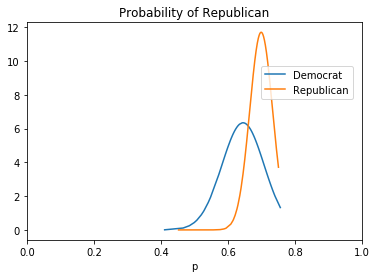

In [25]:
import scipy.stats as stats
import pylab as pl
import matplotlib.pyplot as plt
newData0=sorted(prob0)
newData1=sorted(prob1)
fit0 = stats.norm.pdf(newData0, np.mean(newData0), np.std(newData0))
fit1=stats.norm.pdf(newData1,np.mean(newData1),np.std(newData1))
pl.plot(newData0,fit0,label='Democrat')
pl.plot(newData1,fit1,label='Republican')
#plt.ylabel('Accuracy')
plt.xlabel('p')
plt.title('Probability of Republican')
plt.legend(bbox_to_anchor=(0.7, 0.8), loc=2, borderaxespad=0.)
axes = plt.gca()
axes.set_xlim([0,1])
pl.show()